# LOCA2 USDA Plant Heartiness

In [82]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray            as xr

# Loading pandas

import pandas            as pd

# Loading MetPy

import metpy             as metpy


# Loading Cartopy's Projection and 
#   Geospatial Dataset Plotting Features

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature


import subprocess as subprocess

def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx
#
##########################################################

In [83]:
##########################################################
#
# File and Inventory Control
#

root_directory       = "/data/DATASETS/LOCA_MACA_Ensembles/LOCA2/LOCA2_CONUS/Climate_CONUS/Monthly/"
root_url             = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Monthly/"

loca2_inventory_file = "http://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/LOCA2/Original_CONUS/LOCA2_Model_Member_Available_List.csv"

loca2_ensembles_list = pd.read_csv(filepath_or_buffer = loca2_inventory_file)

loca2_ensembles_list = loca2_ensembles_list.query('Rank == 1')

models               = loca2_ensembles_list[ "Model"].values
members              = loca2_ensembles_list["Member"].values
n_complete_enss      = loca2_ensembles_list["n_complete_ens"].values
historical_invs      = loca2_ensembles_list["historical"].values
ssp245_invs          = loca2_ensembles_list["ssp245"].values
ssp370_invs          = loca2_ensembles_list["ssp370"].values
ssp585_invs          = loca2_ensembles_list["ssp585"].values

prec_invs = loca2_ensembles_list["pr"].values
tmax_invs = loca2_ensembles_list["tasmax"].values
tmin_invs = loca2_ensembles_list["tasmin"].values

scenarios            = ["historical", 
                        "ssp245", 
                        "ssp370", 
                        "ssp585"]


display(loca2_ensembles_list)





#
##########################################################




,Model,Member,Var,Season,Stat,NetError,Rank,historical,ssp245,ssp370,ssp585,tasmax,tasmin,pr,n_complete_ens,n_avail_ens
0,GFDL-ESM4,r1i1p1f1,All,Annual,Both,6.152235,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
1,BCC-CSM2-MR,r1i1p1f1,All,Annual,Both,6.357673,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
2,GFDL-CM4,r1i1p1f1,All,Annual,Both,6.498461,1,XNP,XNP,---,XNP,H2-5,H2-5,H2-5,3,3
3,CNRM-CM6-1,r1i1p1f2,All,Annual,Both,6.513064,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
4,TaiESM1,r1i1p1f1,All,Annual,Both,6.658829,1,XNP,XNP,XNP,---,H23-,H23-,H23-,3,3
5,CNRM-ESM2-1,r1i1p1f2,All,Annual,Both,6.681317,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
6,CNRM-CM6-1-HR,r1i1p1f2,All,Annual,Both,6.990708,1,XNP,---,---,XNP,H--5,H--5,H--5,2,2
7,INM-CM4-8,r1i1p1f1,All,Annual,Both,7.238094,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
8,MIROC6,r1i1p1f1,All,Annual,Both,8.165782,1,XNP,XNP,XNP,XNP,H235,H235,H235,4,4
9,MRI-ESM2-0,r5i1p1f1,All,Annual,Both,9.399468,1,XNP,---,XNP,---,H-3-,H-3-,H-3-,2,2


In [92]:
##########################################################
#
# Extract Geospatial Metadata
#

history_initialization_file = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Monthly/historical/LOCA2-CONUS-ANNUAL_MIN___tasmin___GFDL-ESM4.r1i1p1f1___historical.nc"
future_initialization_file  = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/LOCA2/Climate_CONUS/Monthly/ssp585/LOCA2-CONUS-ANNUAL_MIN___tasmin___GFDL-ESM4.r1i1p1f1___ssp585.nc"

xf_h = xr.open_dataset(filename_or_obj = history_initialization_file)
xf_f = xr.open_dataset(filename_or_obj =  future_initialization_file)

xf_h = xf_h.metpy.parse_cf()
xf_f = xf_f.metpy.parse_cf()

display(xf_h.metpy_crs.metpy.cartopy_crs)
data_crs = xf_h.metpy_crs.metpy.cartopy_crs

lat    = xf_h["lat"]
lon    = xf_h["lon"]
time_h = xf_h["time"]
time_f = xf_f["time"]

lon_rap = 360-103.2310
lat_rap =      44.0805

i_rap = geo_idx(lon, lon_rap)
j_rap = geo_idx(lat, lat_rap)

print(lon_rap, i_rap, lon[i_rap].values)
print(lat_rap, j_rap, lat[j_rap].values)

#
##########################################################

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

256.769 <xarray.DataArray 'lon' ()>
array(356)
Coordinates:
    metpy_crs  object Projection: latitude_longitude 256.78125
44.0805 <xarray.DataArray 'lat' ()>
array(323)
Coordinates:
    metpy_crs  object Projection: latitude_longitude 44.09375


In [23]:
loca2_ensembles_list.tasmin.str.contains("3").sum()

20

<xarray.DataArray 'lon' ()>
array(356)
Coordinates:
    metpy_crs  object Projection: latitude_longitude

In [ ]:
##########################################################
#
# Loop Test
#

m = 0
#for m in range(len(models)-1):


model          =          models[m]
member         =         members[m]

n_complete_ens = n_complete_enss[m]
prec_inv       =     prec_invs[m]
tmax_inv       =     tmax_invs[m]
tmin_inv       =     tmin_invs[m]

file_url_h = root_directory + "/" + scenarios[0] + "/LOCA2-CONUS-ANNUAL_MIN___tasmin___" + model + "." + member + "___" + scenarios[0] + ".nc"


scenario = scenarios[1]
    #for scenario in scenarios[1:]:
        
print("# ================================================")
print(m)

inventory = loca2_ensembles_list.iloc[m].loc[scenario]
print(str(m)+" "+model+" "+member+" "+scenario+" "+inventory)

        ##if (inventory != "---"):

            
            
print("# ",model,member,scenario,inventory)
            

                     
            ##if ("N" in inventory):
                
print("# ------------------------------------------------")

variable    = "tasmin"

print("#  . . . . . . . . . . . . . . . . . . . . . . . .")

hist_file  = root_url                                         + \
             "historical"                            +   "/"  + \
             "LOCA2-CONUS-ANNUAL_MIN___" + variable  +  "___" + \
             loca2_ensembles_list.at[m,"Model"]      +   "."  + \
             loca2_ensembles_list.at[m,"Member"]     +  "___" + \
             "historical" + ".nc" 

futr_file  = root_url                                        + \
             scenario                               +   "/"  + \
             "LOCA2-CONUS-ANNUAL_MIN___" + variable +  "___" + \
             loca2_ensembles_list.at[m,"Model"]     +   "."  + \
             loca2_ensembles_list.at[m,"Member"]    +  "___" + \
             scenario + ".nc" 

combined_file = root_url                                          + \
                scenario + "/"                                    + \
                "LOCA2-CONUS-ANNUAL30_MIN___" + variable  + "___" + \
                loca2_ensembles_list.at[m,"Model"]        +  "."  + \
                loca2_ensembles_list.at[m,"Member"]       + "___" + \
                scenario + ".nc" 

cdo_command       = "nohup cdo --no_history -f nc4 -z zip_9 cat "

command_aggregate = cdo_command + hist_file + " " + futr_file + " deleteme.nc"                    

xf_h = xr.open_dataset(filename_or_obj = hist_file)
xf_f = xr.open_dataset(filename_or_obj = futr_file)

histgrid   = xf_h['tasmin']
futrgrid = xf_f['tasmin']

tasmin = xr.concat(objs = [histgrid, futrgrid], dim="time")

tasmin = tasmin.rolling(time   =   30, 
                        center = True).mean().dropna(dim = "time", 
                                                        how =  "all")
tasmin = tasmin.expand_dims(dim={"scenario"     : 1,
                                 "model_member" : 1})
tasmin.coords["scenario"]     = [       scenario       ]
tasmin.coords["model_member"] = [(model + "." + member)]

tasmin.to_netcdf()

# ================================================
0
0 GFDL-ESM4 r1i1p1f1 ssp245 XNP
#  GFDL-ESM4 r1i1p1f1 ssp245 XNP
# ------------------------------------------------
#  . . . . . . . . . . . . . . . . . . . . . . . .


<xarray.DataArray 'tasmin' (time: 151, lat: 474, lon: 944)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-07-02T12:00:00 ... 2100-07-02T12:00:00
  * lon      (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.3 293.4 293.5
  * lat      (lat) float32 23.91 23.97 24.03 24.09 ... 53.28 53.34 53.41 53.47
Attributes:
    standard_name:  air_temperature
    long_name:      2-m Min Daily Air Temperature
    units:          degC
    description:    2-m Min Daily Air Temperature
    cell_methods:   time: maximum within days  time: minimum over year
    _ChunkSizes:    [  1 474 944]

<xarray.DataArray 'tasmin' (scenario: 1, model_member: 1, time: 122, lat: 474,
                            lon: 944)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * time          (time) datetime64[ns] 1965-07-02T12:00:00 ... 2086-07-02T12...
  * lon           (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * lat           (lat) float32 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * scenario      (scenario) <U6 'ssp245'
  * model_member  (model_member) <U18 'GFDL-ESM4.r1i1p1f1'
Attributes:
    standard_name:  air_temperature
    long_name:      2-m Min Daily Air Temperature
    units:          degC
    description:    2-m Min Daily Air Temperature
    cell_methods:   time: maximum within days  time: minimum over year
    _ChunkSizes:    [  1 474 944]

In [120]:
tasmin_ra[:,j_rap,i_rap].plot()
tasmin[:,j_rap,i_rap].plot()
plt.show()


IndexError: index 356 is out of bounds for axis 0 with size 122

ValueError: Dimension scenario already exists.

In [117]:
display(tasmin_ra)

<xarray.DataArray 'tasmin' (scenario: 1, model_member: 1, time: 122, lat: 474,
                            lon: 944)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * time          (time) datetime64[ns] 1965-07-02T12:00:00 ... 2086-07-02T12...
  * lon           (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * lat           (lat) float32 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
  * scenario      (scenario) <U6 'ssp245'
  * model_member  (model_member) <U18 'GFDL-ESM4.r1i1p1f1'
Attributes:
    standard_name:  air_temperature
    long_name:      2-m Min Daily Air Temperature
    units:          degC
    description:    2-m Min Daily Air Temperature
    cell_methods:   time: maximum within days  time: minimum over year
    _ChunkSizes:    [  1 474 944]

NameError: name 'tasmin_degF_avg' is not defined

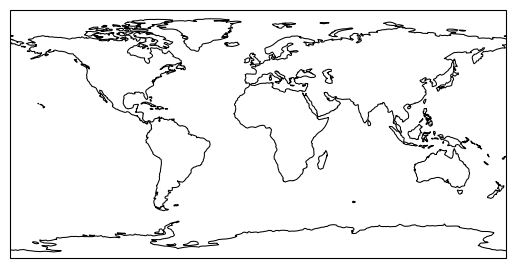

In [112]:
###################################################
#
# Integrating a projection data to our image data.
#

# make a figure space 

fig = plt.figure()

# add a plot element just one field

                   # nrows, ncols, index [which oddly starts with one (go fig)],
ax = fig.add_subplot(    1,     1,     1, 
                     projection = data_crs)

#ax.set_extent((lon.min(), lon.max(), lat.min(), lat.max()))

# of you use the coastlines and add_feature you can see it does 
#   the full cone and our place on it


ax.coastlines(resolution = 'auto',
              linewidths =  0.75)

t2m_degF_levels = np.arange(start = -60,
                            stop  =  70,
                            step  =  5)

contour = tasmin_degF_avg.plot(cmap          = plt.cm.rainbow, 
                               levels        = t2m_degF_levels,
                               cbar_kwargs   = {"orientation" : "horizontal", 
                                                "pad":.01})



ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
 
#ax.gridlines(draw_labels=True)

# here is our plot from above.

# and pow this will give us our mapping.

# Let's overlay our pressure contours.




plt.show()

#
###################################################